In [20]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from pathlib import Path
import seaborn as sns
import numpy as np

pd.set_option('use_inf_as_na', True)

C:\Users\lbarleta\AppData\Local\Temp\ipykernel_68912\2356409379.py:8: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('use_inf_as_na', True)


In [ ]:
RAW_DATA_DIR = Path('../raw_data/')
DATA_DIR = Path('../data/')

# Basic EDA

## Renewals

In [3]:
renewals = pd.read_csv(DATA_DIR / 'renewals_totals.csv', index_col=0, dtype={'ZIP Code': str})
renewals.head(2)

,ZIP Code,New,Renewed,Expiring,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed,Pct NonRenewed,Pct NonRenewed Owner,Pct NonRenewed Company
0,90001,5348,37886,42472,2974,1612,0.107977,0.070023,0.037954
1,90002,5837,37321,42395,3444,1630,0.119684,0.081236,0.038448


In [4]:
renewals.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1697 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZIP Code                      1697 non-null   object 
 1   New                           1697 non-null   int64  
 2   Renewed                       1697 non-null   int64  
 3   Expiring                      1697 non-null   int64  
 4   Insured-Initiated Nonrenewed  1697 non-null   int64  
 5   Insurer-Initiated Nonrenewed  1697 non-null   int64  
 6   Pct NonRenewed                1697 non-null   float64
 7   Pct NonRenewed Owner          1697 non-null   float64
 8   Pct NonRenewed Company        1697 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 132.6+ KB


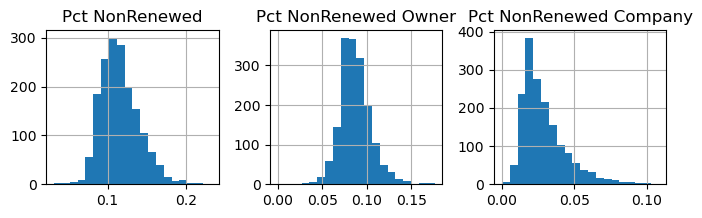

In [5]:
# distribution
feats = ['Pct NonRenewed', 'Pct NonRenewed Owner', 'Pct NonRenewed Company']
renewals[feats].hist(bins=20, layout=(1, 3), figsize=(8,2))
plt.show()

## Premiums

In [6]:
premiums = pd.read_csv(DATA_DIR / 'premiums_totals.csv', dtype={'ZIP Code': str}, index_col=0)
premiums.head(2)

,2018,2019,2020,2021,2022,2023,Pct Change 2018-21
ZIP Code,,,,,,,
90001,484901.285714,504140.857143,547563.857143,708151.833333,772361.666667,851829.0,0.460404
90002,569980.500000,603840.833333,660567.166667,721661.333333,795190.333333,868758.0,0.266116


In [7]:
premiums.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2040 entries, 90001 to 96162
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   2018                2040 non-null   float64
 1   2019                2025 non-null   float64
 2   2020                2017 non-null   float64
 3   2021                2040 non-null   float64
 4   2022                2014 non-null   float64
 5   2023                1995 non-null   float64
 6   Pct Change 2018-21  2040 non-null   float64
dtypes: float64(7)
memory usage: 192.0+ KB


In [8]:
# log normalize yearly earned premiums

premiums['log_2018'] = np.log(premiums['2018'])
premiums['log_2021'] = np.log(premiums['2021'])

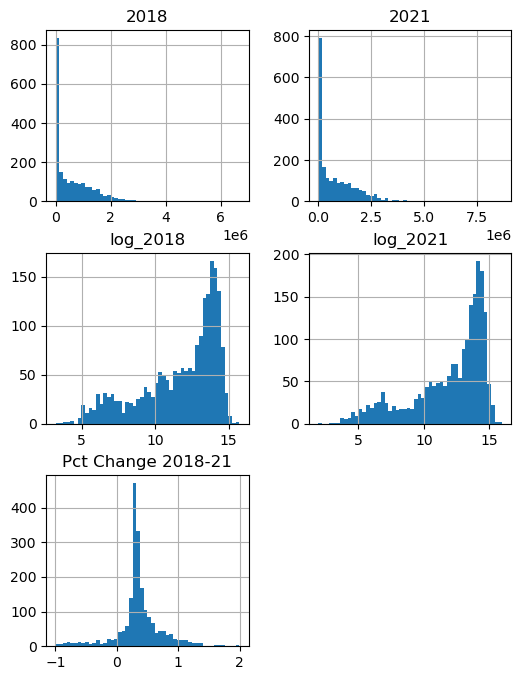

In [9]:
premiums[['2018','2021','log_2018','log_2021','Pct Change 2018-21']].hist(bins=50, figsize=(6,8), layout=(3,2))
plt.show()

## FAIR Plan

In [32]:
fair = pd.read_csv(DATA_DIR / 'fair_plan.csv', index_col=0, dtype={'ZIP Code': str})
fair.head(2)

,ZIP Code,growth_pol_23_24,policies_24,growth_pol_22_23,policies_23,growth_pol_21_22,policies_22,growth_pol_20_21,policies_21,policies_20,growth_exp_23_24,exposure_24,growth_exp_22_23,exposure_23,growth_exp_21_22,exposure_22,growth_exp_20_21,exposure_21,exposure_20
0,94501,0.333,104,0.04,78,-0.063,75,0.0,80,80,0.676,98431342,0.179,58719416,0.137,49797731,0.091,43791971,40143917
1,94502,2.500,7,0.00,2,1.000,2,0.0,1,1,13.274,6880050,0.025,481983,1.850,470279,0.000,165000,165000


In [33]:
fair.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1649 entries, 0 to 1648
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ZIP Code          1649 non-null   object 
 1   growth_pol_23_24  1649 non-null   float64
 2   policies_24       1649 non-null   int64  
 3   growth_pol_22_23  1649 non-null   float64
 4   policies_23       1649 non-null   int64  
 5   growth_pol_21_22  1649 non-null   float64
 6   policies_22       1649 non-null   int64  
 7   growth_pol_20_21  1649 non-null   float64
 8   policies_21       1649 non-null   int64  
 9   policies_20       1649 non-null   int64  
 10  growth_exp_23_24  1649 non-null   float64
 11  exposure_24       1649 non-null   int64  
 12  growth_exp_22_23  1649 non-null   float64
 13  exposure_23       1649 non-null   int64  
 14  growth_exp_21_22  1649 non-null   float64
 15  exposure_22       1649 non-null   int64  
 16  growth_exp_20_21  1649 non-null   float64
 17  

In [34]:
fair.sample(3)

,ZIP Code,growth_pol_23_24,policies_24,growth_pol_22_23,policies_23,growth_pol_21_22,policies_22,growth_pol_20_21,policies_21,policies_20,growth_exp_23_24,exposure_24,growth_exp_22_23,exposure_23,growth_exp_21_22,exposure_22,growth_exp_20_21,exposure_21,exposure_20
734,93927,0.014,72,0.183,71,0.714,60,0.458,35,24,0.087,53868287,0.100,49552009,1.524,45055638,0.545,17851853,11553491
1149,92036,0.081,966,0.183,894,0.189,756,0.242,636,512,0.140,756630901,0.265,663462431,0.302,524487233,0.370,402876462,294081012
721,96107,0.550,31,0.250,20,3.000,16,-0.200,4,5,0.617,15767717,0.411,9753461,5.020,6913021,-0.056,1148293,1216391


In [38]:
# general conditions to remove outliers
outlier_cond = fair['growth_exp_23_24'] < 200

<Figure size 640x480 with 0 Axes>

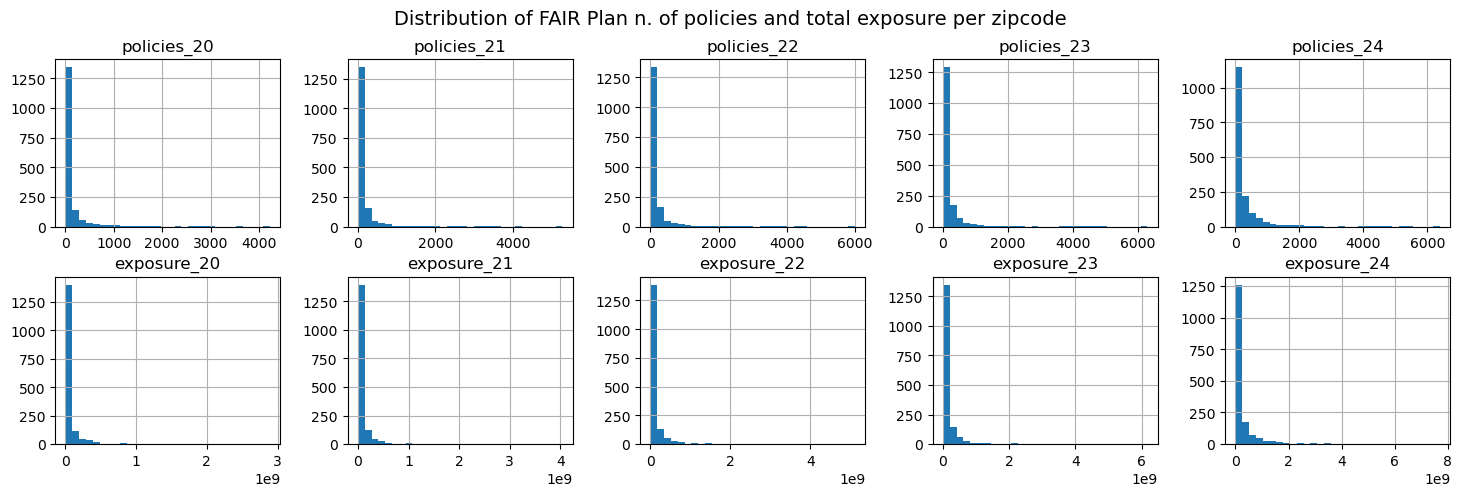

In [39]:
plt.tight_layout()

fair.loc[outlier_cond, ['policies_20', 'policies_21', 'policies_22', 'policies_23', 'policies_24', 
    'exposure_20', 'exposure_21', 'exposure_22', 'exposure_23', 'exposure_24']
    ].hist(bins=30, layout=(2,5), figsize=(18,5))

plt.suptitle('Distribution of FAIR Plan n. of policies and total exposure per zipcode', size=14)

plt.show()

c:\Users\lbarleta\AppData\Local\miniconda3\envs\erdos_summer_2025\Lib\site-packages\pandas\core\algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


<Figure size 640x480 with 0 Axes>

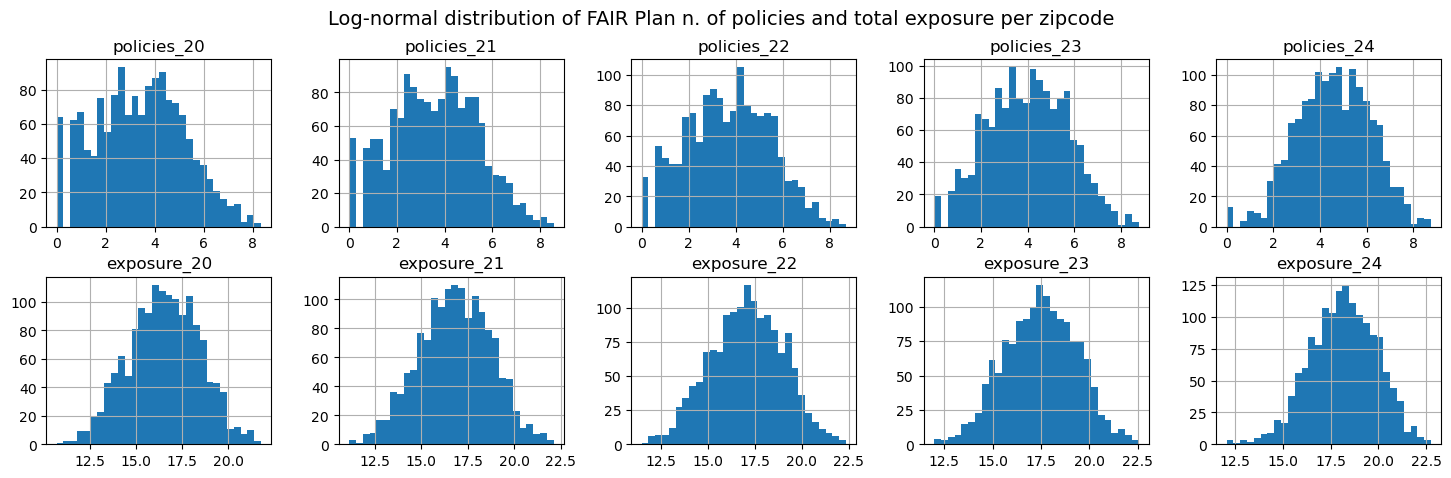

In [40]:
plt.tight_layout()

fair.loc[outlier_cond, ['policies_20', 'policies_21', 'policies_22', 'policies_23', 'policies_24', 
    'exposure_20', 'exposure_21', 'exposure_22', 'exposure_23', 'exposure_24']
    ].map(np.log).dropna().hist(bins=30, layout=(2,5), figsize=(18,5))

plt.suptitle('Log-normal distribution of FAIR Plan n. of policies and total exposure per zipcode', size=14)

plt.show()

<Figure size 640x480 with 0 Axes>

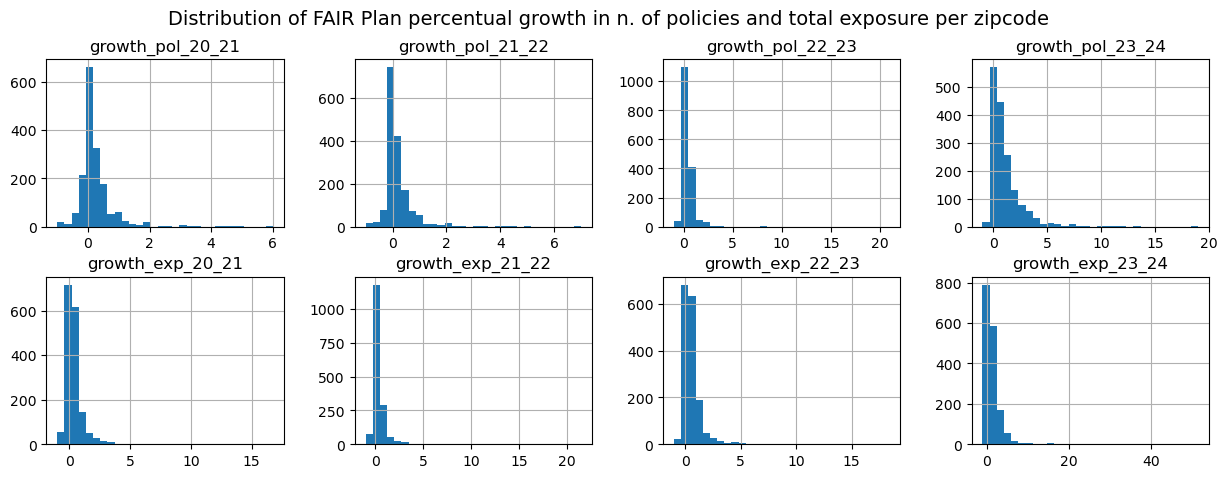

In [ ]:
plt.tight_layout()
fair.loc[outlier_cond, ['growth_pol_20_21', 'growth_pol_21_22', 'growth_pol_22_23', 'growth_pol_23_24', 
                        'growth_exp_20_21', 'growth_exp_21_22', 'growth_exp_22_23', 'growth_exp_23_24']
                        ].hist(figsize=(15,5), layout=(2,4), bins=30)

plt.suptitle('Distribution of FAIR Plan percentual growth in n. of policies and total exposure per zipcode', size=14)

plt.show()

## Premium Change Projections

In [49]:
projs = pd.read_csv(DATA_DIR / 'premium_change2021.csv', index_col=0, dtype={'ZIP Code': str})

projs

,ZIP Code,< -$100,-$100 to -$50,-$50 to -$0,$0 to $50,$50 to $100,> $100,n_decrease,n_increase,ratio_inc_to_dec
2,90004,1,2,4,72,0,0,7,72,0.097222
3,90005,0,0,0,10,0,0,0,10,0.000000
4,90006,0,0,0,9,0,0,0,9,0.000000
5,90007,0,0,0,12,0,0,0,12,0.000000
6,90008,0,0,0,32,0,0,0,32,0.000000
...,...,...,...,...,...,...,...,...,...,...
1452,96145,0,0,2,21,0,0,2,21,0.095238
1453,96146,0,0,1,21,1,0,1,22,0.045455
1454,96148,1,0,1,3,0,0,2,3,0.666667
1455,96150,10,4,4,90,0,0,18,90,0.200000


<Axes: >

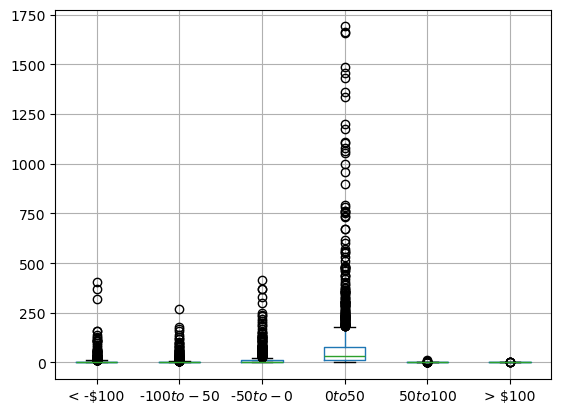

In [43]:
cond1 = projs['$0 to $50'] < 2000
cond2 = projs['-$50 to -$0'] < 2000
outlier_cond = cond1 & cond2

projs.loc[outlier_cond,projs.columns[1:7]].boxplot()


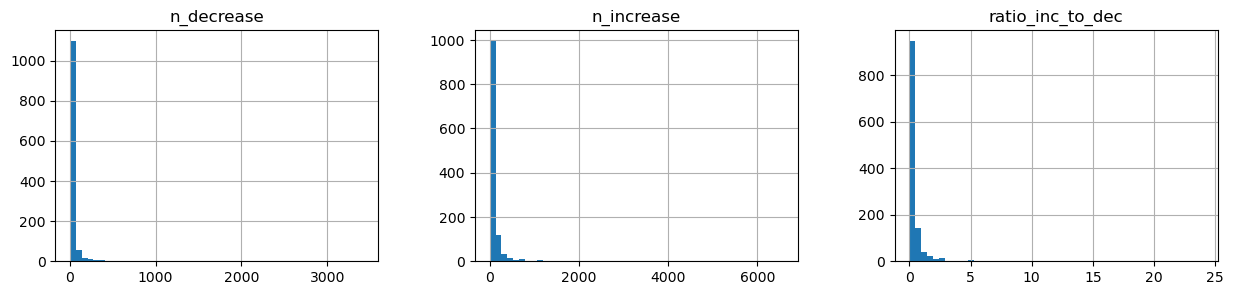

In [44]:
projs[['n_decrease', 'n_increase', 'ratio_inc_to_dec']].hist(figsize=(15,3), bins=50, layout=(1,3))

plt.show()

c:\Users\lbarleta\AppData\Local\miniconda3\envs\erdos_summer_2025\Lib\site-packages\pandas\core\algorithms.py:1743: RuntimeWarning: divide by zero encountered in log
  return lib.map_infer(values, mapper, convert=convert)


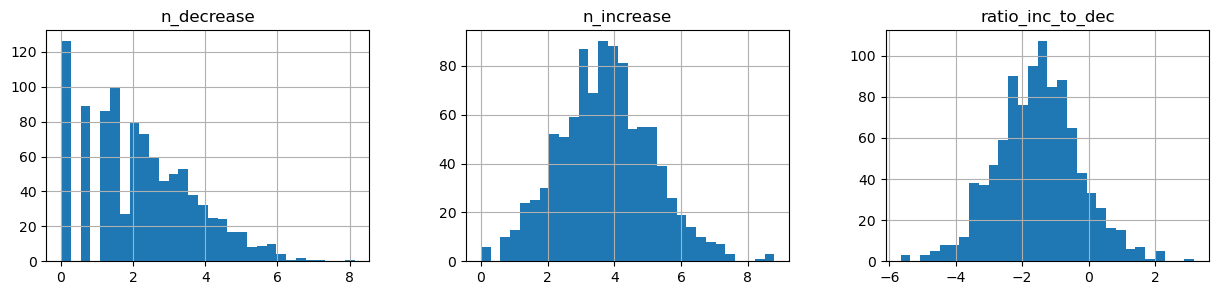

In [45]:
projs[['n_decrease', 'n_increase', 'ratio_inc_to_dec']].map(np.log).dropna().hist(figsize=(15,3), layout=(1,3), bins=30)

plt.show()

# Correlations

In [50]:
# merging all datasets

dfs = [renewals, premiums, fair, projs]

merge = pd.merge(renewals, premiums, on='ZIP Code')
merge = pd.merge(merge, fair, on='ZIP Code')
merge = pd.merge(merge, projs, on='ZIP Code')

In [51]:
merge

,ZIP Code,New,Renewed,Expiring,Insured-Initiated Nonrenewed,Insurer-Initiated Nonrenewed,Pct NonRenewed,Pct NonRenewed Owner,Pct NonRenewed Company,2018,...,exposure_20,< -$100,-$100 to -$50,-$50 to -$0,$0 to $50,$50 to $100,> $100,n_decrease,n_increase,ratio_inc_to_dec
0,90004,3779,27340,31023,2883,800,0.118718,0.092931,0.025787,1.405309e+06,...,186214081,1,2,4,72,0,0,7,72,0.097222
1,90005,914,5874,6799,691,234,0.136049,0.101633,0.034417,4.719390e+05,...,47764364,0,0,0,10,0,0,0,10,0.000000
2,90006,2097,11762,13661,1303,596,0.139009,0.095381,0.043628,3.837860e+05,...,226266225,0,0,0,9,0,0,0,9,0.000000
3,90007,1887,12282,13988,1218,488,0.121962,0.087075,0.034887,3.736593e+05,...,175621744,0,0,0,12,0,0,0,12,0.000000
4,90008,3529,30493,33721,2509,719,0.095727,0.074405,0.021322,8.233626e+05,...,113345657,0,0,0,32,0,0,0,32,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1179,96145,2265,16773,19304,1558,973,0.131113,0.080709,0.050404,9.725312e+05,...,442216627,0,0,2,21,0,0,2,21,0.095238
1180,96146,787,6262,7371,553,556,0.150454,0.075024,0.075431,4.266253e+05,...,358959653,0,0,1,21,1,0,1,22,0.045455
1181,96148,678,4073,4664,403,188,0.126715,0.086407,0.040309,1.689868e+05,...,81559850,1,0,1,3,0,0,2,3,0.666667
1182,96150,13842,94465,108928,9807,4656,0.132776,0.090032,0.042744,2.623284e+06,...,1203942704,10,4,4,90,0,0,18,90,0.200000


In [ ]:
merge.columns

In [ ]:
features = []

sns.pairplot(merge)

# Mapping

In [3]:
zipcodes = gpd.read_file(DATA_DIR / 'CA_zipcodes.geojson')

In [4]:
zipcodes.rename(columns={'ZIP_CODE': 'ZIP Code'}, inplace=True)

In [5]:
renewals_t.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1701 entries, 0 to 1700
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ZIP Code                      1701 non-null   object 
 1   New                           1701 non-null   int64  
 2   Renewed                       1701 non-null   int64  
 3   Expiring                      1701 non-null   int64  
 4   Insured-Initiated Nonrenewed  1701 non-null   int64  
 5   Insurer-Initiated Nonrenewed  1701 non-null   int64  
 6   Pct NonRenewed                1701 non-null   float64
 7   Pct NonRenewed Owner          1701 non-null   float64
 8   Pct NonRenewed Company        1701 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 132.9+ KB


In [6]:
merged = pd.merge(zipcodes, renewals_t, on='ZIP Code')

<Axes: >

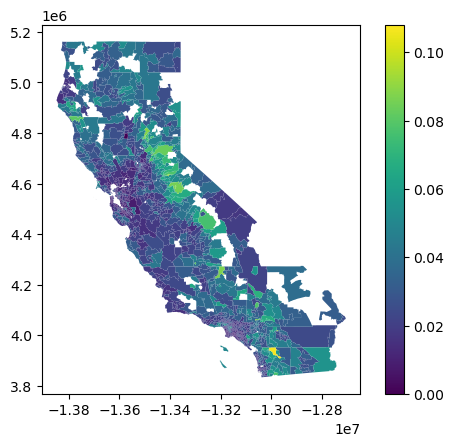

In [7]:
merged.plot(column='Pct NonRenewed Company', legend=True)

<class 'pandas.core.frame.DataFrame'>
Index: 1717 entries, 0 to 1716
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ZIP Code                1717 non-null   object 
 1   Voluntary Market Units  1717 non-null   int64  
 2   FAIR Plan Units         1717 non-null   int64  
 3   Total Ins Units         1717 non-null   int64  
 4   Pct Market              1717 non-null   float64
 5   Pct FAIR                1717 non-null   float64
dtypes: float64(2), int64(3), object(1)
memory usage: 93.9+ KB


In [ ]:
step1 = pd.merge(renewals_t, fair, on='ZIP Code')
insurance = pd.merge(step1, premiuns, on='ZIP Code')

In [ ]:
features = ['Pct NonRenewed Company', 'Pct FAIR', 'Pct Premium Increase 18-21']

insurance[features].corr()

,Pct NonRenewed Company,Pct FAIR,Pct Premium Increase 18-21
Pct NonRenewed Company,1.000000,0.727360,0.489322
Pct FAIR,0.727360,1.000000,0.650911
Pct Premium Increase 18-21,0.489322,0.650911,1.000000


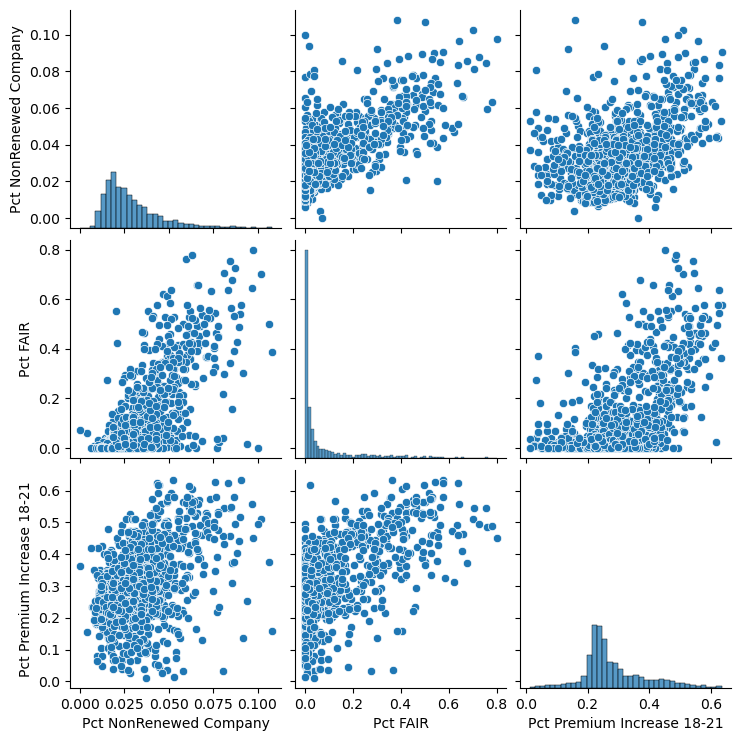

In [66]:
sns.pairplot(insurance[features])

In [ ]:
# outliers on premium increase